## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [362]:
import numpy as np 
import pandas as pd


In [363]:
from sklearn.datasets import load_boston
dataset = load_boston()
dataset.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [364]:
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [365]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

[ 4.56945324e+01 -5.14934508e+01  3.80785408e+00  9.10377806e+00
 -1.67065427e+01 -2.93977614e+00  7.44617051e+00  3.93811605e+01
 -1.18797067e+01  3.00469901e+01  5.22237634e+01 -1.53412351e+01
  1.05334042e+02 -3.56596162e+01 -2.51884659e+01  2.51579070e+01
 -1.05706794e+01  3.09481639e+01 -4.62296097e+01 -2.61564697e+01
  1.02596728e+01  6.20724416e+01  1.08269526e+01 -8.82049597e+00
 -1.49792929e+02 -5.64222332e+01  4.89727985e+00 -4.88419334e+01
 -2.60831374e+01  1.28120095e+02 -7.91704342e+01 -3.68067896e+01
  1.33643136e+00 -2.91454283e+00  8.82097967e+01 -8.60397009e+01
  5.68209641e+01  2.63299273e+00  6.17077189e+01  3.83207199e+01
 -3.24435254e+01  2.07209904e+00 -1.08776868e+02 -3.96302756e+01
 -4.63074902e+01 -6.42533974e+01  3.99400852e+01 -1.93156101e+01
  2.28686168e+01  9.93773115e+01 -1.87659556e+01  4.07269201e+01
 -1.20380823e+02 -2.43019565e+01 -8.75885711e+01  5.69140040e+01
 -2.82960839e+01 -5.70670489e+01  7.09959916e+00  5.19030875e+01
 -2.08822146e+01  2.06515

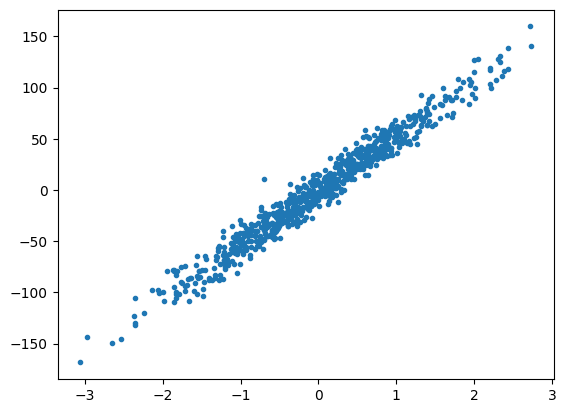

In [366]:
plt.plot(x_train, y_train, '.')
# print(y_train)
# print(type(y_train))
# print(y_train.shape)

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

weight = 52.70508258663796
intercept = -0.3383734841771964
MSE loss for 100 epochs: [1362.633005073672, 1185.537621729891, 1032.3400062720843, 899.8137771192146, 785.168361944768, 685.9900978207983, 600.1912963388955, 525.9661959446273, 461.75286965311096, 406.20028247133195, 358.13980191885037, 316.5605593299301, 280.5881411397811, 249.46615983671805, 222.54031519689823, 199.24460910235004, 179.08942279416578, 161.65120479742686, 146.56355180800432, 133.50949427593392, 122.21482387985118, 112.4423221015984, 103.986768146087, 96.67062091210077, 90.3402839536006, 84.86287467965967, 80.1234296850039, 76.02248730755011, 72.47399646910578, 69.4035077389306, 66.74660851276228, 64.4475693480773, 62.45817294863889, 60.73670114190218, 59.24705852297959, 57.95801431898887, 56.8425465185563, 55.877274465646806, 55.04196798023508, 54.31912267996231, 53.69359257086346, 53.15227218091874, 52.68382155302488, 52.278428315997296, 51.92760183243013, 51.623995097115056, 51.361250643478705, 51.1338672204

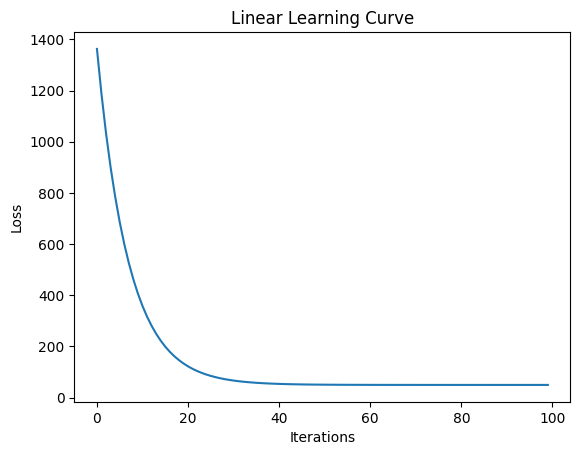

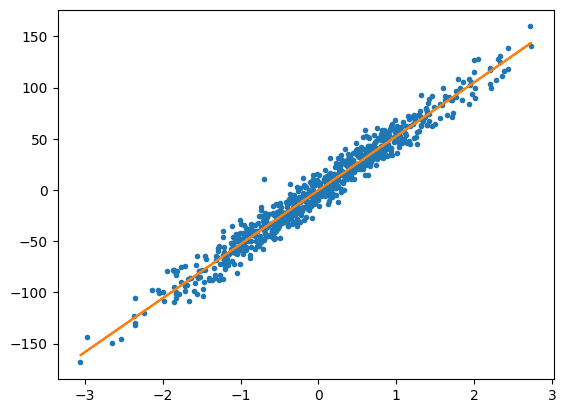

In [367]:

class Linear:
    def __init__(self, w=None):
        if w is None:
            self.w = np.random.randn(2, 1)
        else:
            self.w = w

    def get_weight(self):
        return self.w

    def criterion(self, y_pred, y_train):
        return 1/2*np.square(y_pred-y_train).mean()

    def derivative(self, x_train, y_train, y_pred):
        tmp = y_pred - y_train
        dw = np.matmul(x_train.T, tmp)
        return dw

    def feedforward(self, x_train):
        return np.array(np.matmul(x_train, self.w))

    def train(self, x_train, y_train):
        num_epoch = 100
        lr = 0.0001
        real_x_train = x_train
        x_train = np.array([np.append(x, 1) for x in x_train])
        y_train = y_train[:,np.newaxis]
        y_pred = None
        lost_lst = []
        for i in range(num_epoch):
            mse_loss = 0
            y_pred = self.feedforward(x_train)
            mse_loss = self.criterion(y_pred, y_train)
            lost_lst.append(mse_loss)
            dw = self.derivative(x_train, y_train, y_pred)
            self.w = self.w - lr * dw
        print(f"weight = {float(self.w[0])}")
        print(f"intercept = {float(self.w[1])}")
        print(f"MSE loss for 100 epochs: {lost_lst}")
        plt.figure()
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.plot(lost_lst)
        plt.title("Linear Learning Curve")
        plt.show()

        plt.figure()
        plt.plot(real_x_train, y_train, ".") 
        plt.plot(real_x_train, y_pred)
        plt.show()
model = Linear()
model.train(x_train, y_train)
saved_weight = model.get_weight()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [368]:
x_test = np.array([np.append(x, 1) for x in x_test])
y_test = y_test[:,np.newaxis]
# print(x_test.shape)
# print(saved_weight)
model = Linear(w = saved_weight)
y_pred = model.feedforward(x_test)
# print(model.criterion(y_pred, y_test))

(250, 2)
[[52.70508259]
 [-0.33837348]]
55.16074671757153


# Part 2. Logistic regreesion model

## Load classification data

In [369]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)
# print(y_train.shape)
# print(x_train[:30])

[[ 0.56415116]
 [ 0.45775197]
 [-1.55894065]
 [-1.09210066]
 [ 2.3196418 ]
 [ 1.08376793]
 [-0.73256932]
 [-1.11297859]
 [-0.74896016]
 [ 2.56911807]
 [ 0.72325035]
 [ 0.85809212]
 [ 0.07733357]
 [ 2.90422899]
 [ 0.3060706 ]
 [-1.62207838]
 [ 1.98801812]
 [ 1.20059802]
 [ 1.7424246 ]
 [-0.01171281]
 [-1.28506955]
 [ 1.52864936]
 [-0.55243612]
 [ 2.2441179 ]
 [ 1.71497265]
 [-1.0744329 ]
 [-1.1095723 ]
 [-1.20115458]
 [ 0.10824405]
 [ 0.18580385]]


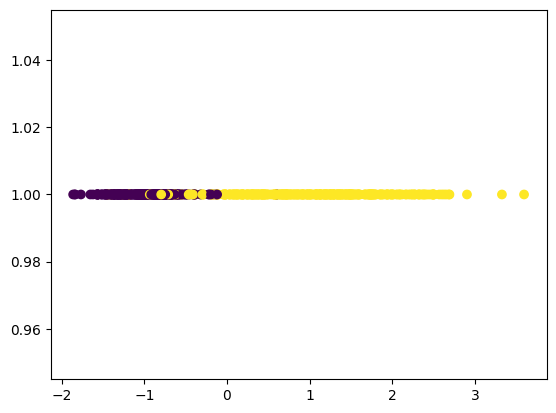

In [370]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

weight = 3.6016354367559216
intercept = 0.9454243685484911
CE loss for 100 epochs: [1.240648831638102, 0.8707558073845503, 0.6423111343948609, 0.5138374746574937, 0.43871826494777133, 0.3907939878319568, 0.3577908350047525, 0.3336962224605151, 0.3153079849101791, 0.30078500556148213, 0.2889995143559884, 0.2792240526500658, 0.2709689958233537, 0.2638929117445196, 0.2577504799751111, 0.25236087446881494, 0.24758783328055015, 0.2433266800299112, 0.2394956292575723, 0.23602981465409675, 0.2328770958819806, 0.2299950557136921, 0.2273488112510146, 0.2249093928779494, 0.22265252619082837, 0.22055770458172916, 0.2186074745481213, 0.21678687879522673, 0.215083017835173, 0.21348470159145078, 0.21198217009189033, 0.21056686771587874, 0.20923125933443895, 0.20796867950108738, 0.2067732079261, 0.20563956600916491, 0.20456303036293844, 0.20353936013655216, 0.20256473561746036, 0.20163570610520787, 0.20074914545021863, 0.1999022139627248, 0.19909232564227963, 0.19831711987241207, 0.1975744368795082, 

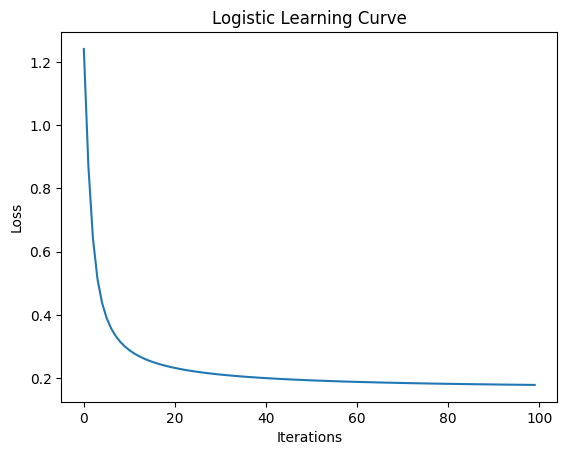

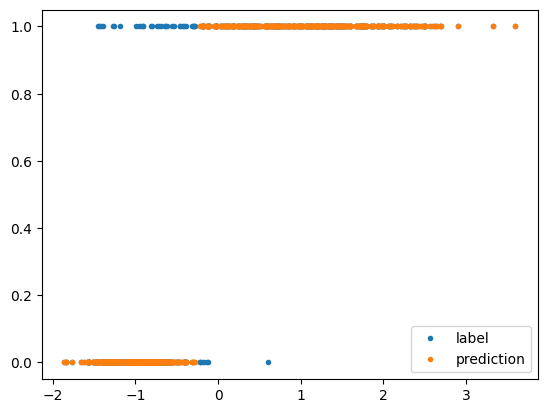

In [371]:

class Logistic:
    def __init__(self, w=None):
        if w is None:
            self.w = np.random.randn(2, 1)
        else:
            self.w =w

    def get_weight(self):
        return self.w

    def criterion(self, y_prob, y_train):
        sum_loss = np.multiply(y_train, np.log(y_prob)) + np.multiply(1-y_train, np.log(1-y_prob))
        return -sum_loss.mean() 

    def derivative(self, x_train, y_train, y_prob):
        tmp = y_prob - y_train
        dw = np.matmul(x_train.T, tmp)
        return dw

    def feedforward(self, x_train):
        a = np.array(np.matmul(x_train, self.w))
        y_prob = 1 / (1 + np.exp(-a)) 
        return y_prob

    def train(self, x_train, y_train):
        num_epoch = 100
        lr = 0.001
        real_x_train = x_train
        x_train = np.array([np.append(x, 1) for x in x_train])
        y_train = y_train[:,np.newaxis]
        y_prob = None
        lost_lst = []
        for i in range(num_epoch):
            ce_loss = 0
            y_prob = self.feedforward(x_train)
            ce_loss = self.criterion(y_prob, y_train)
            # print(ce_loss)
            lost_lst.append(ce_loss)
            dw = self.derivative(x_train, y_train, y_prob)
            self.w = self.w - lr * dw
        
        print(f"weight = {float(self.w[0])}")
        print(f"intercept = {float(self.w[1])}")
        print(f"CE loss for 100 epochs: {lost_lst}")
        plt.figure()
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.plot(lost_lst)
        plt.title("Logistic Learning Curve")
        plt.show()
        y_pred = np.round(y_prob)
        plt.figure()
        plt.plot(real_x_train, y_train, ".") 
        plt.plot(real_x_train, y_pred, ".")
        plt.legend(labels=["label", "prediction"], loc = "best") # , "training accuracy"

        plt.show()
model = Logistic()
model.train(x_train, y_train)
saved_weight = model.get_weight()